In [1]:
import os
os.listdir("/kaggle/input")

['cifar10-pngs-in-folders']

In [2]:
os.listdir("/kaggle/input/cifar10-pngs-in-folders/cifar10")

['cifar10', 'test', 'train']

In [3]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/cifar10-pngs-in-folders/cifar10/train",
    validation_split=0.2,       # 20% of training for validation
    subset="training",
    seed=42,                    # ensures same split each run
    image_size=(224, 224),      # preprocesng step to  resize all images 
    batch_size=64,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/cifar10-pngs-in-folders/cifar10/train",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=64,
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/cifar10-pngs-in-folders/cifar10/test",
    image_size=(224, 224),
    batch_size=64,
    label_mode="categorical"
)


2025-10-03 19:10:08.274153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759518608.629896      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759518608.735098      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 50000 files belonging to 10 classes.
Using 40000 files for training.


I0000 00:00:1759518671.694016      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759518671.694817      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 50000 files belonging to 10 classes.
Using 10000 files for validation.
Found 10000 files belonging to 10 classes.


In [2]:
class_names=train_ds.class_names
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

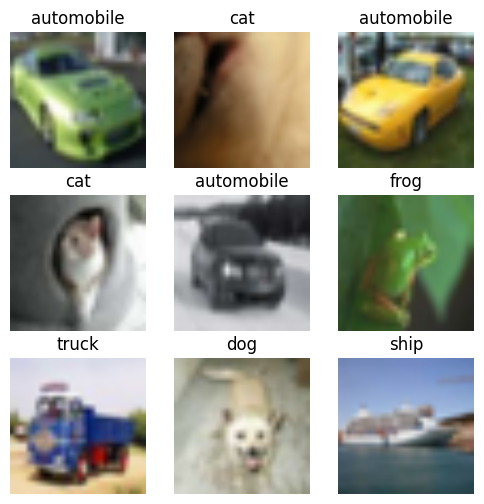

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Example: visualize some training images
plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):  # take one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        img = images[i].numpy()
        
        # If already in [0,1], keep it. If in [0,255], normalize
        if img.max() > 1.0:
            img = img.astype("uint8")   # values 0–255
        else:
            img = np.clip(img, 0, 1)    # keep in 0–1 range
        
        plt.imshow(img)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

## MobileNetV2

In [18]:
from tensorflow.keras.applications import MobileNetV2

base_model =MobileNetV2(
    input_shape=(224, 224, 3), #tells the model what size it will recieve
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze convolutional base

Mobile_model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # important for flattening
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")  # change 10 → number of classes
])



In [9]:
#Mobile_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

Mobile_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),  # ✅ integer labels
    metrics=["accuracy"]
)


In [10]:
Mobile_hist=Mobile_model.fit(train_ds,epochs=40,validation_data=val_ds)

Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.5071 - loss: 1.3979 - val_accuracy: 0.5262 - val_loss: 1.3503
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5103 - loss: 1.3936 - val_accuracy: 0.5268 - val_loss: 1.3491
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.5161 - loss: 1.3866 - val_accuracy: 0.5284 - val_loss: 1.3492
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5130 - loss: 1.3845 - val_accuracy: 0.5261 - val_loss: 1.3478
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5128 - loss: 1.3897 - val_accuracy: 0.5270 - val_loss: 1.3472
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5153 - loss: 1.3834 - val_accuracy: 0.5267 - val_loss: 1.3479
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5089 - loss: 1.3887 - val_accuracy: 0.5271 - val_loss: 1.3468
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5151 - loss: 1.3852 - 

## EfficientNet_B0,B4

In [17]:
from tensorflow.keras.applications import EfficientNetB0

In [19]:
base_efcnt=EfficientNetB0(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_efcnt.trainable=False

efficientB0_model = tf.keras.models.Sequential([
    base_efcnt,
    tf.keras.layers.GlobalAveragePooling2D(),  # important for flattening
    tf.keras.layers.Dense(10, activation="softmax")  # change 10 → number of classes
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
efficientB0_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
efficientB0_history=efficientB0_model.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 101ms/step - accuracy: 0.7624 - loss: 0.7912 - val_accuracy: 0.8880 - val_loss: 0.3364
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8857 - loss: 0.3392 - val_accuracy: 0.8952 - val_loss: 0.2988
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8957 - loss: 0.3071 - val_accuracy: 0.9015 - val_loss: 0.2844
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9048 - loss: 0.2833 - val_accuracy: 0.9042 - val_loss: 0.2768
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9078 - loss: 0.2687 - val_accuracy: 0.9066 - val_loss: 0.2708
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9127 - loss: 0.2567 - val_accuracy: 0.9075 - val_loss: 0.2659
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9162 - loss: 0.2462 - val_accuracy: 0.9101 - val_loss: 0.2612
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9167 - loss: 0.2427 -

In [32]:
from tensorflow.keras.applications import EfficientNetB4
base_efcntB4=EfficientNetB4(
    input_shape=(224,224,3),
    weights='imagenet',
    include_top=False
)
base_efcntB4.trainable=False

efcntB4_model=tf.keras.Sequential([
    base_efcntB4,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10,activation='softmax',)
])

In [34]:
efcntB4_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
efcntB4_history=efcntB4_model.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 224s 276ms/step - accuracy: 0.8419 - loss: 0.5964 - val_accuracy: 0.9191 - val_loss: 0.2518
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9213 - loss: 0.2464 - val_accuracy: 0.9233 - val_loss: 0.2331
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9295 - loss: 0.2215 - val_accuracy: 0.9260 - val_loss: 0.2242
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9349 - loss: 0.2032 - val_accuracy: 0.9265 - val_loss: 0.2201
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.9372 - loss: 0.1907 - val_accuracy: 0.9286 - val_loss: 0.2159
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.9412 - loss: 0.1845 - val_accuracy: 0.9299 - val_loss: 0.2147
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9423 - loss: 0.1732 - val_accuracy: 0.9288 - val_loss: 0.2134
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9449 -

## ResNet

In [5]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# Inside your pipeline
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds   = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds  = test_ds.map(lambda x, y: (preprocess_input(x), y))


In [15]:
base_res101=ResNet101V2(
    input_shape=(224,224,3),
    include_top=False,
    weights=None,
    
)
base_res101.trainable=False

res101_model=tf.keras.Sequential([
    base_res101,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [22]:
res101_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
res101_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 253s 370ms/step - accuracy: 0.3483 - loss: 1.7772 - val_accuracy: 0.3528 - val_loss: 1.7518
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 221s 353ms/step - accuracy: 0.3686 - loss: 1.7363 - val_accuracy: 0.3689 - val_loss: 1.7244
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 221s 353ms/step - accuracy: 0.3767 - loss: 1.7041 - val_accuracy: 0.3792 - val_loss: 1.6849
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 221s 354ms/step - accuracy: 0.3910 - loss: 1.6801 - val_accuracy: 0.3788 - val_loss: 1.6753
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 352ms/step - accuracy: 0.3997 - loss: 1.6537 - val_accuracy: 0.3964 - val_loss: 1.6334
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 221s 354ms/step - accuracy: 0.4052 - loss: 1.6344 - val_accuracy: 0.3991 - val_loss: 1.6214
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 221s 354ms/step - accuracy: 0.4151 - loss: 1.6125 - val_accuracy: 0.4116 - val_loss: 1.6032
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 353ms/step - accuracy: 0.4223 -

## VGG19

In [29]:
from tensorflow.keras.applications import VGG19
base_vgg=VGG19(
    include_top=False,
    weights=None,
    input_shape=(224,224,3)
)
base_vgg.trainable=False

vgg_model=tf.keras.Sequential([
    base_vgg,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

vgg_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
vgg_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


2025-10-03 20:32:24.664449: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng36{k2=3,k3=0} for conv (f32[64,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-10-03 20:32:24.748756: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.084416755s
Trying algorithm eng36{k2=3,k3=0} for conv (f32[64,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

625/625 ━━━━━━━━━━━━━━━━━━━━ 345s 519ms/step - accuracy: 0.1071 - loss: 2.3019 - val_accuracy: 0.1372 - val_loss: 2.2953
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 505ms/step - accuracy: 0.1432 - loss: 2.2887 - val_accuracy: 0.1489 - val_loss: 2.2686
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 507ms/step - accuracy: 0.1531 - loss: 2.2606 - val_accuracy: 0.1494 - val_loss: 2.2502
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 506ms/step - accuracy: 0.1535 - loss: 2.2437 - val_accuracy: 0.1498 - val_loss: 2.2431
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 507ms/step - accuracy: 0.1527 - loss: 2.2368 - val_accuracy: 0.1491 - val_loss: 2.2403
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 505ms/step - accuracy: 0.1548 - loss: 2.2338 - val_accuracy: 0.1498 - val_loss: 2.2389
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 507ms/step - accuracy: 0.1540 - loss: 2.2322 - val_accuracy: 0.1500 - val_loss: 2.2382
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 507ms/step - accuracy: 0.1531 - loss: 2.23

In [35]:
from tensorflow.keras.applications import InceptionV3

base_inception=InceptionV3(
    include_top=False,
    input_shape=(224,224,3),
    weights=None
)

base_inception.trainable=False

inception_model=tf.keras.Sequential([
    base_inception,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

inception_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
inception_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 177ms/step - accuracy: 0.1175 - loss: 2.2966 - val_accuracy: 0.1425 - val_loss: 2.2585
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.1487 - loss: 2.2466 - val_accuracy: 0.1476 - val_loss: 2.2391
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 156ms/step - accuracy: 0.1531 - loss: 2.2303 - val_accuracy: 0.1634 - val_loss: 2.2279
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.1656 - loss: 2.2164 - val_accuracy: 0.1800 - val_loss: 2.2077
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 156ms/step - accuracy: 0.1808 - loss: 2.1958 - val_accuracy: 0.1971 - val_loss: 2.1817
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 158ms/step - accuracy: 0.1988 - loss: 2.1677 - val_accuracy: 0.1986 - val_loss: 2.1499
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.2117 - loss: 2.1334 - val_accuracy: 0.2068 - val_loss: 2.1154
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 156ms/step - accuracy: 0.2213 - loss: 